# ANALISIS EXPLORATORIO DE DATOS - MODULO 3
## ALUMNO : CÉSAR MAYTA

## DATASET : https://www.kaggle.com/datasets/raminhuseyn/dataset-from-tiktok

### OBJETIVO : ANALIZAR VISTAS VS LIKES

## VALIDACIÓN DE DATOS Y ANALISIS DE NULOS

### 1 - IMPORTAR LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2 - ESTABLECER APARIENCIA DE GRAFICOS

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

### 3 - CARGAMOS EL DATASET

In [3]:
df_tiktok = pd.read_csv('/content/tiktok_dataset.csv')
df_tiktok

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


### 4 - ANALISIS DE TIPOS DE DATOS

In [4]:
df_tiktok.dtypes

,0
#,int64
claim_status,object
video_id,int64
video_duration_sec,int64
video_transcription_text,object
verified_status,object
author_ban_status,object
video_view_count,float64
video_like_count,float64
video_share_count,float64


In [5]:
df_tiktok.dtypes.value_counts()

,count
float64,5
object,4
int64,3


In [6]:
df_tiktok.shape

(19382, 12)

### 5 - ANALISIS DE VALORES NULOS

In [8]:
df_tiktok.isnull().any()

,0
#,False
claim_status,True
video_id,False
video_duration_sec,False
video_transcription_text,True
verified_status,False
author_ban_status,False
video_view_count,True
video_like_count,True
video_share_count,True


In [9]:
df_tiktok.isnull().sum().sort_values(ascending=False)

,0
claim_status,298
video_transcription_text,298
video_view_count,298
video_like_count,298
video_share_count,298
video_download_count,298
video_comment_count,298
#,0
video_id,0
video_duration_sec,0


In [12]:
plot_null_tiktok = df_tiktok.isnull().melt(value_name='missing')
plot_null_tiktok

,variable,missing
0,#,False
1,#,False
2,#,False
3,#,False
4,#,False
...,...,...
232579,video_comment_count,True
232580,video_comment_count,True
232581,video_comment_count,True
232582,video_comment_count,True


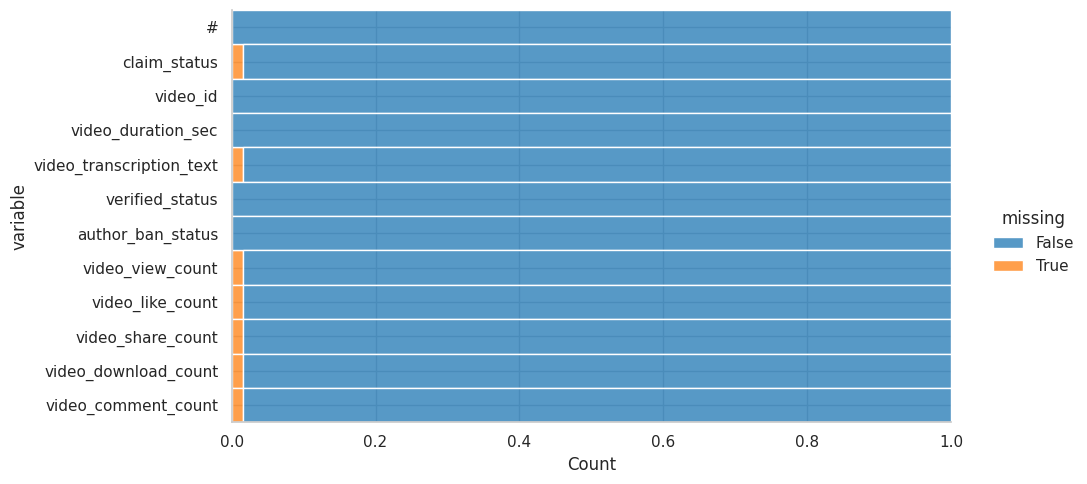

In [10]:

sns.displot(data=plot_null_tiktok,y='variable',hue='missing',aspect=2,multiple='fill')

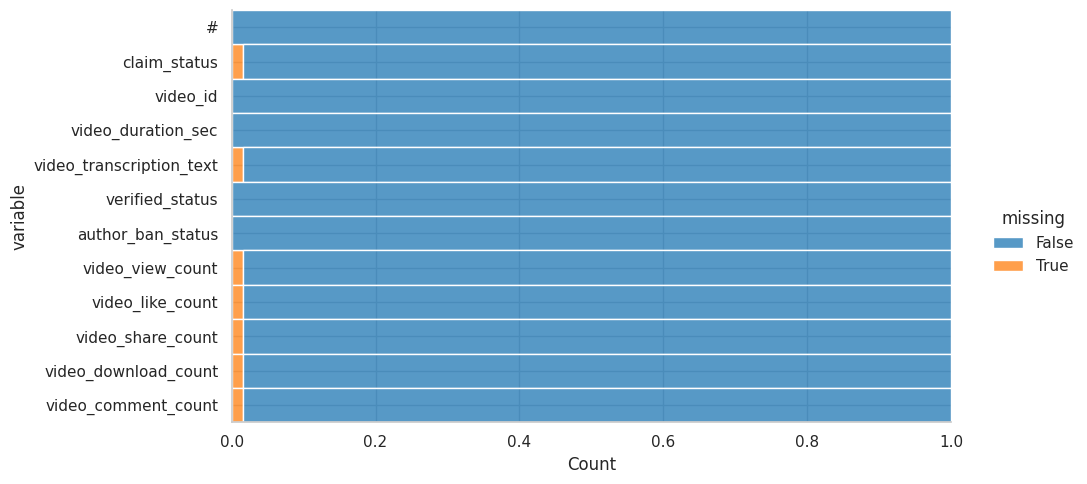

In [11]:
(
    df_tiktok
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )

    )
)

<Axes: >

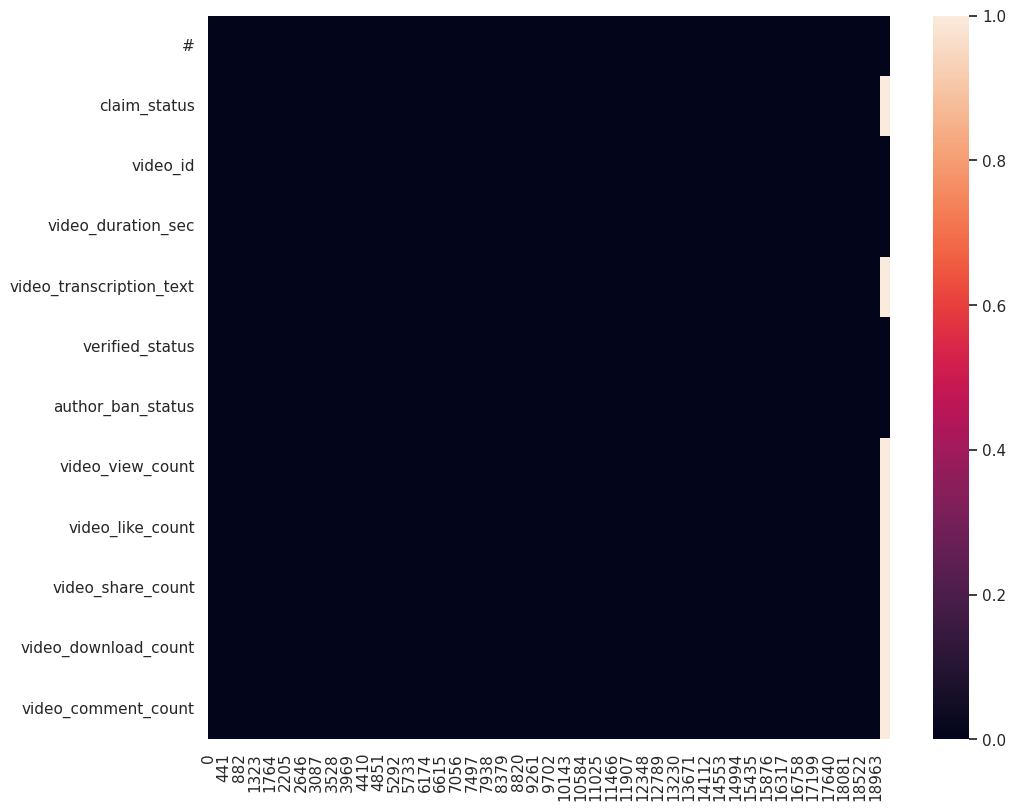

In [13]:
(
    df_tiktok
    .isnull()
    .transpose()
    .pipe(
        lambda df : sns.heatmap(data=df)
    )
)

In [17]:
int(df_tiktok.shape[0]) - int(df_tiktok.dropna().shape[0])

298

In [19]:
(int(df_tiktok.shape[0]) - int(df_tiktok.dropna().shape[0])) / int(df_tiktok.shape[0]) * 100

1.5375090289959756

In [20]:
df_tiktok = df_tiktok.dropna()
df_tiktok.shape

(19084, 12)

## ESTADISTICA DESCRIPTIVA

### 1 - MEDIDAS DE TENDENCIA CENTRAL

MEDIA

In [22]:
df_tiktok.mean(numeric_only=True)

,0
#,9.542500e+03
video_id,5.624840e+09
video_duration_sec,3.242381e+01
video_view_count,2.547086e+05
video_like_count,8.430464e+04
video_share_count,1.673525e+04
video_download_count,1.049430e+03
video_comment_count,3.493121e+02


MEDIANA

In [23]:
df_tiktok.median(numeric_only=True)

,0
#,9.542500e+03
video_id,5.609500e+09
video_duration_sec,3.200000e+01
video_view_count,9.954500e+03
video_like_count,3.403500e+03
video_share_count,7.170000e+02
video_download_count,4.600000e+01
video_comment_count,9.000000e+00


MODA

In [24]:
df_tiktok.mode(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,1234959018,6.0,2562.0,32.0,2.0,0.0,0.0
1,2,1235937767,NaN,7393.0,NaN,NaN,NaN,NaN
2,3,1236284548,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1236594147,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1237008133,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
19079,19080,9999160062,NaN,NaN,NaN,NaN,NaN,NaN
19080,19081,9999298421,NaN,NaN,NaN,NaN,NaN,NaN
19081,19082,9999715467,NaN,NaN,NaN,NaN,NaN,NaN
19082,19083,9999834973,NaN,NaN,NaN,NaN,NaN,NaN


### 2 - MEDIDAS DE DISPERSION

RANGO ( MAXIMOS Y MINIMOS)

In [25]:
df_tiktok.min(numeric_only=True)

,0
#,1.000000e+00
video_id,1.234959e+09
video_duration_sec,5.000000e+00
video_view_count,2.000000e+01
video_like_count,0.000000e+00
video_share_count,0.000000e+00
video_download_count,0.000000e+00
video_comment_count,0.000000e+00


In [26]:
df_tiktok.max(numeric_only=True)

,0
#,1.908400e+04
video_id,9.999873e+09
video_duration_sec,6.000000e+01
video_view_count,9.998170e+05
video_like_count,6.578300e+05
video_share_count,2.561300e+05
video_download_count,1.499400e+04
video_comment_count,9.599000e+03


DESVIACIÓN STANDARD

In [27]:
df_tiktok.std(numeric_only=True)

,0
#,5.509221e+03
video_id,2.537030e+09
video_duration_sec,1.622647e+01
video_view_count,3.228933e+05
video_like_count,1.334205e+05
video_share_count,3.203617e+04
video_download_count,2.004300e+03
video_comment_count,7.996389e+02


RANGO INTERCUARTILICO

In [33]:
(df_tiktok
 .quantile(q=[0.25,0.50,0.75],numeric_only=True)
 .transpose()
 .rename_axis('metric')
 .reset_index()
 .assign(iqr = lambda df: df[0.75] - df[0.25])
 )

,metric,0.25,0.5,0.75,iqr
0,#,4.771750e+03,9.542500e+03,1.431325e+04,9.541500e+03
1,video_id,3.425100e+09,5.609500e+09,7.840823e+09,4.415723e+09
2,video_duration_sec,1.800000e+01,3.200000e+01,4.700000e+01,2.900000e+01
3,video_view_count,4.942500e+03,9.954500e+03,5.043270e+05,4.993845e+05
4,video_like_count,8.107500e+02,3.403500e+03,1.250200e+05,1.242092e+05
5,video_share_count,1.150000e+02,7.170000e+02,1.822200e+04,1.810700e+04
6,video_download_count,7.000000e+00,4.600000e+01,1.156250e+03,1.149250e+03
7,video_comment_count,1.000000e+00,9.000000e+00,2.920000e+02,2.910000e+02


GRAFICAMOS MEDIDAS CENTRALES Y DE DISPERSIÓN DE LA VARIABLE video_duration_sec

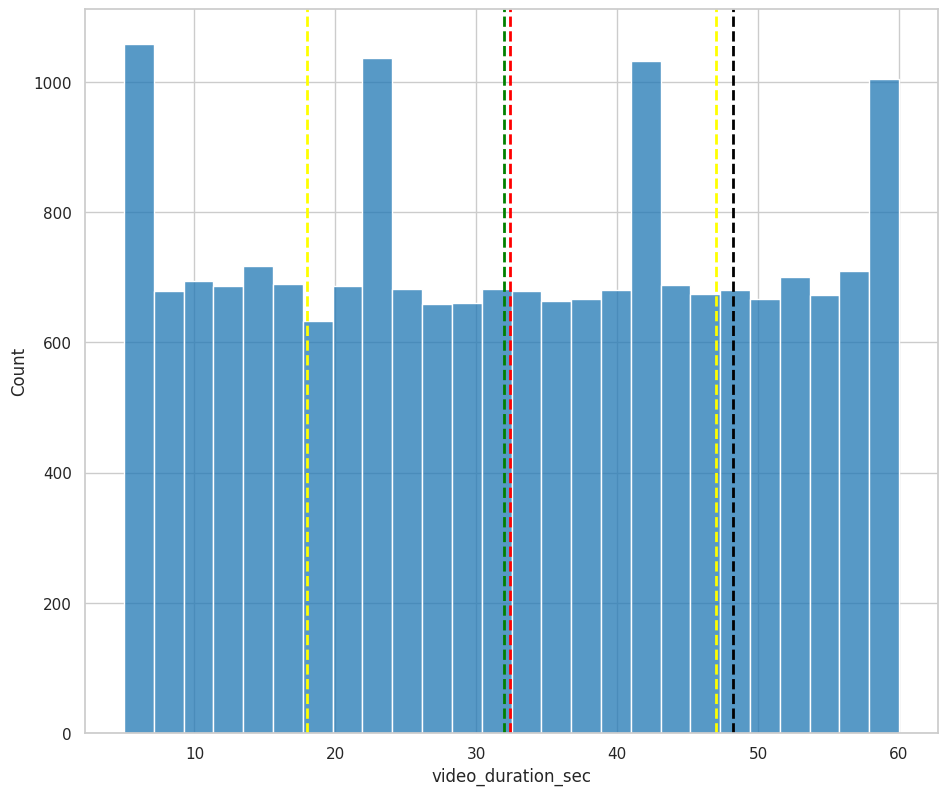

In [44]:
sns.histplot(
    data=df_tiktok,
    x='video_duration_sec'
)
plt.axvline(
    x=df_tiktok.video_duration_sec.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df_tiktok.video_duration_sec.median(),
    color='green',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df_tiktok.video_duration_sec.median() + df_tiktok.video_duration_sec.std(),
    color='black',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df_tiktok.video_duration_sec.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df_tiktok.video_duration_sec.quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)


<Axes: xlabel='video_duration_sec'>

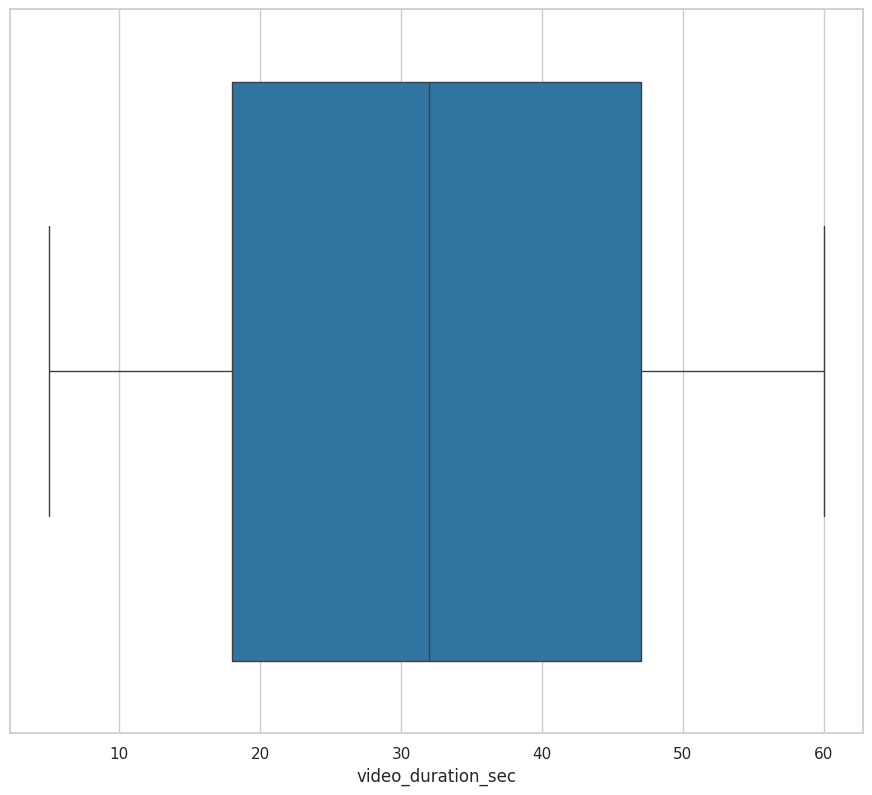

In [45]:
sns.boxplot(x=df_tiktok.video_duration_sec)